<a href="https://colab.research.google.com/github/ZhijiaoGao/Programming-Course/blob/main/Edited_python_week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Session 2

Now we are going to practice some analyses with our data

In [ ]:
# Load in our choice and demographic data
import pandas as pd


data=pd.read_csv("https://raw.githubusercontent.com/CaitlinLloyd/Psychology_Programming2025/refs/heads/main/Data/demo.csv")
choices=pd.read_csv("https://raw.githubusercontent.com/CaitlinLloyd/Psychology_Programming2025/refs/heads/main/Data/FCT_df.csv")

In [ ]:
choices.head()

,Unnamed: 0,ID,block,trial_number,food,reaction_time,rating,fat,sugar
0,0,1,health,1,apple,2.68,7.0,high,low
1,1,1,health,2,beef,2.05,4.0,high,high
2,2,1,health,3,eggs,NaN,NaN,low,low
3,3,1,health,4,cookie,0.86,4.0,high,high
4,4,1,health,5,bacon,1.51,8.0,low,high


In [ ]:
df_merged = pd.merge(data, choices, on='ID', how='left')


In [ ]:
df_merged

,Unnamed: 0_x,ID,Age,Patient,Medication,BMI,Fat (g),Calories,Protein (g),Sugar (g),EDE Score,Duration of Illness,Unnamed: 0_y,block,trial_number,food,reaction_time,rating,fat,sugar
0,0,1,56,Yes,Yes,17.9,6,365,4,25,4.9,1.9,0,health,1,apple,2.68,7.0,high,low
1,0,1,56,Yes,Yes,17.9,6,365,4,25,4.9,1.9,1,health,2,beef,2.05,4.0,high,high
2,0,1,56,Yes,Yes,17.9,6,365,4,25,4.9,1.9,2,health,3,eggs,NaN,NaN,low,low
3,0,1,56,Yes,Yes,17.9,6,365,4,25,4.9,1.9,3,health,4,cookie,0.86,4.0,high,high
4,0,1,56,Yes,Yes,17.9,6,365,4,25,4.9,1.9,4,health,5,bacon,1.51,8.0,low,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,39,40,38,Yes,No,17.7,19,254,12,23,3.8,1.5,8995,choice,71,toast,3.72,5.0,high,high
8996,39,40,38,Yes,No,17.7,19,254,12,23,3.8,1.5,8996,choice,72,pizza,0.95,8.0,high,low
8997,39,40,38,Yes,No,17.7,19,254,12,23,3.8,1.5,8997,choice,73,ice cream,3.36,6.0,high,low
8998,39,40,38,Yes,No,17.7,19,254,12,23,3.8,1.5,8998,choice,74,tofu,1.27,9.0,low,high


In [ ]:
# Now summarize the means and reaction times for foods varying in fat and sugar

#Now let's create a new dataframe and store each persons average RT and rating for high and low fat foods

# Group by participant, block, and fat level
summary_df = (
    df_merged
    .dropna(subset=['rating', 'reaction_time'])  # Exclude trials with missing values
    .groupby(['ID', 'block', 'fat','sugar'])
    .agg(
        average_rating=('rating', 'mean'),
        average_reaction_time=('reaction_time', 'mean'),
        trial_count=('rating', 'count')  # Optional: to see how many valid trials per group
    )
    .reset_index()
)

print(summary_df.head(6))

   ID   block   fat sugar  average_rating  average_reaction_time  trial_count
0   1  choice  high  high        5.333333               1.997333           15
1   1  choice  high   low        6.055556               2.148889           18
2   1  choice   low  high        5.576923               2.175769           26
3   1  choice   low   low        5.312500               2.511875           16
4   1  health  high  high        4.888889               1.976667           18
5   1  health  high   low        6.411765               1.978235           17


In [ ]:
# Group by participant, block, and fat level
part1=df_merged[df_merged['ID']==1]

summary_df = (
    part1
    .dropna(subset=['rating', 'reaction_time'])  # Exclude trials with missing values
    .groupby(['block', 'fat','sugar'])
    .agg(
        average_rating=('rating', 'mean'),
        average_reaction_time=('reaction_time', 'mean'),
        trial_count=('rating', 'count')  # Optional: to see how many valid trials per group
    )
    .reset_index()
)

print(summary_df.head(6))

    block   fat sugar  average_rating  average_reaction_time  trial_count
0  choice  high  high        5.333333               1.997333           15
1  choice  high   low        6.055556               2.148889           18
2  choice   low  high        5.576923               2.175769           26
3  choice   low   low        5.312500               2.511875           16
4  health  high  high        4.888889               1.976667           18
5  health  high   low        6.411765               1.978235           17


In [ ]:
print(summary_df.head(12))

    ID   block   fat sugar  average_rating  average_reaction_time  trial_count
0    1  choice  high  high        5.333333               1.997333           15
1    1  choice  high   low        6.055556               2.148889           18
2    1  choice   low  high        5.576923               2.175769           26
3    1  choice   low   low        5.312500               2.511875           16
4    1  health  high  high        4.888889               1.976667           18
5    1  health  high   low        6.411765               1.978235           17
6    1  health   low  high        5.913043               1.944348           23
7    1  health   low   low        5.066667               2.838667           15
8    1   taste  high  high        5.466667               2.131333           15
9    1   taste  high   low        5.066667               2.360667           15
10   1   taste   low  high        5.600000               2.097000           20
11   1   taste   low   low        5.600000          

In [ ]:
df_merged["ID"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40])

In [ ]:
# for participant #1, calculate average RT and rating for each combination of high/low fat and high/low sugar for each block
# use a for loop for this
for ID in df_merged["ID"].unique():
  part1=df_merged[df_merged['ID']==ID]
  for block in ['health','taste','choice']:
    for fat in ['high','low']:
      for sugar in ['high','low']:
        dat=part1[(part1['block']==block)&(part1['fat']==fat)&(part1['sugar']==sugar)]
        rating=dat['rating'].mean()
        rt=dat['reaction_time'].mean()
        print(block,fat,sugar,rt,rating)







health high high 1.976666666666667 4.888888888888889
health high low 1.9782352941176469 6.411764705882353
health low high 1.9443478260869564 5.913043478260869
health low low 2.8386666666666667 5.066666666666666
taste high high 2.131333333333333 5.466666666666667
taste high low 2.3606666666666665 5.066666666666666
taste low high 2.0970000000000004 5.6
taste low low 2.208 5.6
choice high high 1.9973333333333334 5.333333333333333
choice high low 2.148888888888889 6.055555555555555
choice low high 2.1757692307692307 5.576923076923077
choice low low 2.511875 5.3125
health high high 2.256315789473684 5.315789473684211
health high low 2.75875 4.125
health low high 2.086521739130434 5.913043478260869
health low low 2.295833333333333 4.875
taste high high 2.171111111111111 5.388888888888889
taste high low 2.287142857142857 5.571428571428571
taste low high 2.2735 6.05
taste low low 2.128181818181818 5.954545454545454
choice high high 2.1857142857142855 4.714285714285714
choice high low 2.6188235

In [ ]:
# Pivot to wide format
df_wide  = summary_df.pivot_table(
    index='ID',
    columns=['block', 'fat','sugar'],
    values=['average_rating', 'average_reaction_time']
)



# Flatten the column names
df_wide.columns = [
    f"{val}_{block}_fat{fat}_sugar{sugar}"
    for val, block, fat, sugar in df_wide.columns
]

df_wide = df_wide.reset_index()
print(df_wide.head())



   ID  average_rating_choice_fathigh_sugarhigh  \
0   1                                 5.333333   
1   2                                 4.714286   
2   3                                 5.421053   
3   4                                 4.882353   
4   5                                 5.444444   

   average_rating_choice_fathigh_sugarlow  \
0                                6.055556   
1                                6.352941   
2                                5.000000   
3                                4.461538   
4                                5.357143   

   average_rating_choice_fatlow_sugarhigh  \
0                                5.576923   
1                                4.800000   
2                                6.050000   
3                                5.259259   
4                                5.421053   

   average_rating_choice_fatlow_sugarlow  \
0                               5.312500   
1                               5.050000   
2                        

In [ ]:
# now select some columns from the demographic frame and merge with our wide_df
demo_sub=data[['ID','Patient','BMI','EDE Score','Age']]


In [ ]:
demo_sub=pd.merge(demo_sub,df_wide,on='ID',how='left')

In [ ]:
demo_sub

,ID,Patient,BMI,EDE Score,Age,average_rating_choice_fathigh_sugarhigh,average_rating_choice_fathigh_sugarlow,average_rating_choice_fatlow_sugarhigh,average_rating_choice_fatlow_sugarlow,average_rating_health_fathigh_sugarhigh,...,average_reaction_time_choice_fatlow_sugarhigh,average_reaction_time_choice_fatlow_sugarlow,average_reaction_time_health_fathigh_sugarhigh,average_reaction_time_health_fathigh_sugarlow,average_reaction_time_health_fatlow_sugarhigh,average_reaction_time_health_fatlow_sugarlow,average_reaction_time_taste_fathigh_sugarhigh,average_reaction_time_taste_fathigh_sugarlow,average_reaction_time_taste_fatlow_sugarhigh,average_reaction_time_taste_fatlow_sugarlow
0,1,Yes,17.9,4.9,56,5.333333,6.055556,5.576923,5.312500,4.888889,...,2.175769,2.511875,1.976667,1.978235,1.944348,2.838667,2.131333,2.360667,2.097000,2.208000
1,2,Yes,18.6,5.3,46,4.714286,6.352941,4.800000,5.050000,5.315789,...,2.439000,2.123000,2.256316,2.758750,2.086522,2.295833,2.171111,2.287143,2.273500,2.128182
2,3,No,22.3,0.6,32,5.421053,5.000000,6.050000,5.916667,4.222222,...,2.476500,2.435417,1.810000,2.247368,2.176000,2.136400,2.181875,2.464545,2.211579,2.096667
3,4,No,22.9,0.5,60,4.882353,4.461538,5.259259,6.312500,5.833333,...,2.267037,2.182500,2.307778,2.170588,2.108500,2.018333,2.093043,2.081000,1.867000,2.108500
4,5,Yes,15.7,4.1,25,5.444444,5.357143,5.421053,5.217391,6.142857,...,2.062632,2.337826,2.427857,2.234286,2.555833,2.189130,2.252667,1.963636,2.265455,2.099630
5,6,Yes,17.2,3.5,38,6.647059,6.400000,5.666667,4.750000,5.928571,...,2.444444,2.656250,2.175000,2.060000,2.025000,2.566500,2.400952,2.225000,2.108000,2.526316
6,7,Yes,18.7,4.6,56,6.647059,5.214286,6.285714,5.318182,5.000000,...,1.920952,2.303636,2.341000,2.266923,2.211304,2.291053,2.748889,2.758667,2.316522,1.485882
7,8,Yes,17.2,4.2,36,6.076923,6.294118,5.375000,5.684211,5.076923,...,2.215833,2.490526,2.083846,2.222500,1.908333,2.111429,2.855625,2.147500,2.400000,1.908421
8,9,No,22.0,1.7,40,6.444444,7.000000,4.333333,5.958333,5.409091,...,1.991250,2.411667,2.359091,2.022857,1.825652,2.031333,2.254286,2.166154,2.113333,2.449565
9,10,No,22.8,0.2,28,5.000000,4.473684,7.000000,6.357143,5.500000,...,2.410588,2.347143,2.125000,2.693158,2.651176,2.317692,2.486842,2.321739,2.087917,2.232222


In [ ]:
# now let's group by patient group and calculate means of food ratings, BMI, age, EDEQ
# we first need to import numpy


In [ ]:
# mean is np.mean()
import numpy as np
np.mean(demo_sub.BMI)

np.float64(20.252499999999998)

In [ ]:
## mean BMI for patients
np.mean(demo_sub[demo_sub['Patient']=='Yes'].BMI)

pt=demo_sub[demo_sub['Patient']=='No']

np.mean(pt.BMI)
pt['BMI'].mean()



In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

In [ ]:
vars_to_test=['BMI']
# Split the data by group
patients = demo_sub[demo_sub['Patient'] == 'Yes']
controls = demo_sub[demo_sub['Patient'] == 'No']

ttest_ind(patients["BMI"], controls["BMI"], equal_var=False)



TtestResult(statistic=np.float64(-10.791806874555933), pvalue=np.float64(1.3885387097385098e-11), df=np.float64(28.53186336492906))

In [ ]:
# now lets compare the groups using a t-test
vars_to_test=['BMI', "Age", "EDE Score"]
# Split the data by group
patients = demo_sub[demo_sub['Patient'] == 'Yes']
controls = demo_sub[demo_sub['Patient'] == 'No']

#ttest_ind(patients[var], controls[var], equal_var=False)

# Store results
results = []

for var in vars_to_test:
    # Run t-test
    t_stat, p_val = ttest_ind(patients[var], controls[var], equal_var=False)  # Welch's t-test

    results.append({
        'variable': var,
        'mean_patient': patients[var].mean(),
        'mean_control': controls[var].mean(),
        't_stat': t_stat,
        'p_value': p_val
    })

# Convert to DataFrame
ttest_results = pd.DataFrame(results)
print(ttest_results)

    variable  mean_patient  mean_control     t_stat       p_value
0        BMI     17.304762     23.510526 -10.791807  1.388539e-11
1        Age     43.857143     39.473684   1.039726  3.050922e-01
2  EDE Score      4.400000      1.084211  13.264938  1.399998e-15


What do these data tell us?

In [ ]:
# Now let's average across the high and low sugar foods for each person - we need to create a new variable

In [ ]:
# Now do some plots to show associations between two variables
import matplotlib.pyplot as plt
import seaborn as sns



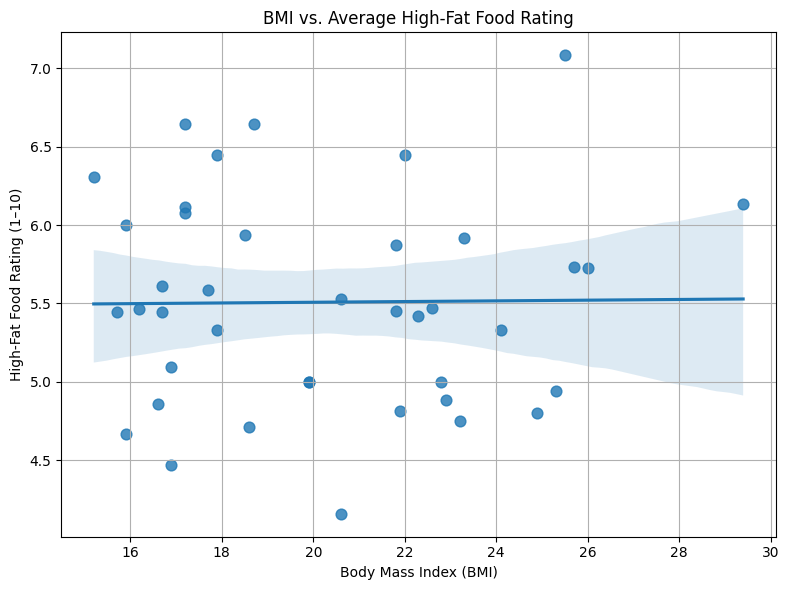

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(data=demo_sub, x='BMI', y='average_rating_choice_fathigh_sugarhigh', scatter_kws={'s': 60})

plt.title('BMI vs. Average High-Fat Food Rating')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('High-Fat Food Rating (1–10)')
plt.grid()
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

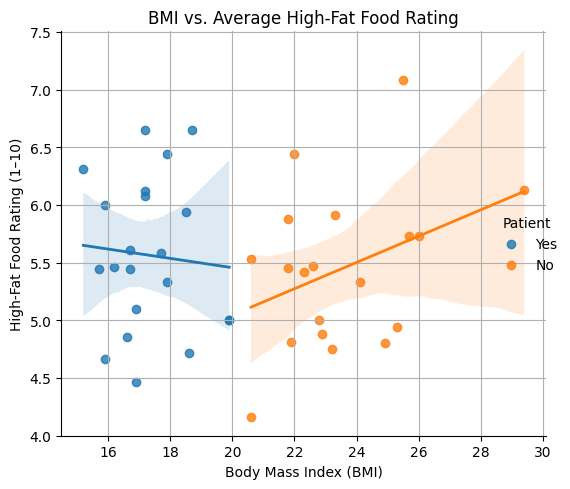

In [ ]:
# color by patient group
plt.figure(figsize=(8, 6))
sns.lmplot(data=demo_sub, x='BMI', y='average_rating_choice_fathigh_sugarhigh', hue='Patient',line_kws={'linewidth': 2})


plt.title('BMI vs. Average High-Fat Food Rating')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('High-Fat Food Rating (1–10)')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

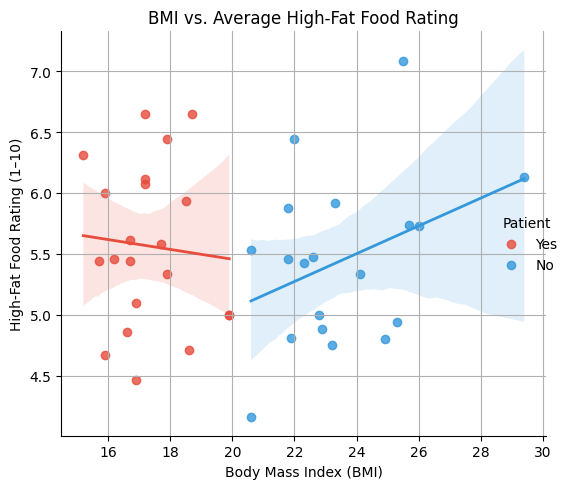

In [ ]:
#We can change the colors using a custom palette

custom_palette = {
    'Yes': '#E74C3C',   # red
    'No': '#3498DB'    # blue
}

# color by patient group
plt.figure(figsize=(8, 6))
sns.lmplot(data=demo_sub, x='BMI', y='average_rating_choice_fathigh_sugarhigh', hue='Patient',line_kws={'linewidth': 2},palette=custom_palette)


lt.title('BMI vs. Average High-Fat Food Rating')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('High-Fat Food Rating (1–10)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# change the plot labels

In [ ]:
#Is the plot different if we look at high-fat and low-sugar foods?
# How about if we plot average high-fat (collapse across sugar)

In [ ]:
# Advanced
# Try and plot, in the patient group only BMI against choice preference for high vs low fat

In [ ]:
# Let's also look at age

In [ ]:
# Now, let's use a regression model to compare patients and HC and adjust for age
import statsmodels.formula.api as smf

# Variables to test
variables = ['BMI']

results = []

for var in variables:
    # Formula: outcome ~ patient_status + age
    formula = f"{var} ~ C(Patient) + Age"

    # Fit linear model
    model = smf.ols(formula=formula, data=demo_sub).fit()

    # Extract results for patient_status (the group effect)
    coef = model.params.get('C(Patient)[T.Yes]', float('nan'))
    pval = model.pvalues.get('C(Patient)[T.Yes]', float('nan'))
    conf_int = model.conf_int().loc['C(Patient)[T.Yes]'].tolist()

    results.append({
        'variable': var,
        'coef_patient_vs_control': coef,
        'p_value': pval,
        'conf_lower': conf_int[0],
        'conf_upper': conf_int[1]
    })

# Convert to DataFrame and print
df_results = pd.DataFrame(results)
print(df_results)

  variable  coef_patient_vs_control       p_value  conf_lower  conf_upper
0      BMI                -6.148525  6.697756e-13    -7.31085     -4.9862


In [ ]:
demo_sub

,ID,Patient,BMI,EDE Score,Age,average_rating_choice_fathigh_sugarhigh,average_rating_choice_fathigh_sugarlow,average_rating_choice_fatlow_sugarhigh,average_rating_choice_fatlow_sugarlow,average_rating_health_fathigh_sugarhigh,...,average_reaction_time_choice_fatlow_sugarhigh,average_reaction_time_choice_fatlow_sugarlow,average_reaction_time_health_fathigh_sugarhigh,average_reaction_time_health_fathigh_sugarlow,average_reaction_time_health_fatlow_sugarhigh,average_reaction_time_health_fatlow_sugarlow,average_reaction_time_taste_fathigh_sugarhigh,average_reaction_time_taste_fathigh_sugarlow,average_reaction_time_taste_fatlow_sugarhigh,average_reaction_time_taste_fatlow_sugarlow
0,1,Yes,17.9,4.9,56,5.333333,6.055556,5.576923,5.312500,4.888889,...,2.175769,2.511875,1.976667,1.978235,1.944348,2.838667,2.131333,2.360667,2.097000,2.208000
1,2,Yes,18.6,5.3,46,4.714286,6.352941,4.800000,5.050000,5.315789,...,2.439000,2.123000,2.256316,2.758750,2.086522,2.295833,2.171111,2.287143,2.273500,2.128182
2,3,No,22.3,0.6,32,5.421053,5.000000,6.050000,5.916667,4.222222,...,2.476500,2.435417,1.810000,2.247368,2.176000,2.136400,2.181875,2.464545,2.211579,2.096667
3,4,No,22.9,0.5,60,4.882353,4.461538,5.259259,6.312500,5.833333,...,2.267037,2.182500,2.307778,2.170588,2.108500,2.018333,2.093043,2.081000,1.867000,2.108500
4,5,Yes,15.7,4.1,25,5.444444,5.357143,5.421053,5.217391,6.142857,...,2.062632,2.337826,2.427857,2.234286,2.555833,2.189130,2.252667,1.963636,2.265455,2.099630
5,6,Yes,17.2,3.5,38,6.647059,6.400000,5.666667,4.750000,5.928571,...,2.444444,2.656250,2.175000,2.060000,2.025000,2.566500,2.400952,2.225000,2.108000,2.526316
6,7,Yes,18.7,4.6,56,6.647059,5.214286,6.285714,5.318182,5.000000,...,1.920952,2.303636,2.341000,2.266923,2.211304,2.291053,2.748889,2.758667,2.316522,1.485882
7,8,Yes,17.2,4.2,36,6.076923,6.294118,5.375000,5.684211,5.076923,...,2.215833,2.490526,2.083846,2.222500,1.908333,2.111429,2.855625,2.147500,2.400000,1.908421
8,9,No,22.0,1.7,40,6.444444,7.000000,4.333333,5.958333,5.409091,...,1.991250,2.411667,2.359091,2.022857,1.825652,2.031333,2.254286,2.166154,2.113333,2.449565
9,10,No,22.8,0.2,28,5.000000,4.473684,7.000000,6.357143,5.500000,...,2.410588,2.347143,2.125000,2.693158,2.651176,2.317692,2.486842,2.321739,2.087917,2.232222


In [ ]:
# We can create interaction terms by using * (e.g., Patient * fat would be an interaction between Patient and fat content)
# Try now to examine whether patients and HC differ in choice ratings for high and low fat foods

demo_sub['high_fat_choice'] = demo_sub.average_rating_choice_fathigh_sugarhigh + demo_sub.average_rating_choice_fathigh_sugarlow
demo_sub['low_fat_choice'] = demo_sub.average_rating_choice_fathigh_sugarhigh + demo_sub.average_rating_choice_fathigh_sugarlow

long_vars=demo_sub[['ID','high_fat_choice','low_fat_choice','Patient','Age','BMI']]


long = pd.melt(long_vars,
                  id_vars=['ID'],
                  value_vars=['high_fat_choice','low_fat_choice'],
                  var_name='Fat',
                  value_name='Choice')

long=pd.merge(long,long_vars)




In [ ]:
formula = "Choice ~ C(Patient)*Fat + Age"


model = smf.mixedlm(formula=formula, data=long,groups="ID").fit()

# Extract results for patient_status (the group effect)
coef = model.params.get('C(Patient)[T.Yes]', float('nan'))
pval = model.pvalues.get('C(Patient)[T.Yes]', float('nan'))
conf_int = model.conf_int().loc['C(Patient)[T.Yes]'].tolist()

In [ ]:
# Is this significant?

In [ ]:
# Now try to group the demo df by patient status and correlate fat intake at meal and age

In [ ]:
data

,Unnamed: 0,ID,Age,Patient,Medication,BMI,Fat (g),Calories,Protein (g),Sugar (g),EDE Score,Duration of Illness
0,0,1,56,Yes,Yes,17.9,6,365,4,25,4.9,1.9
1,1,2,46,Yes,Yes,18.6,9,306,12,15,5.3,1.5
2,2,3,32,No,Yes,22.3,24,635,36,20,0.6,NaN
3,3,4,60,No,No,22.9,32,456,27,21,0.5,NaN
4,4,5,25,Yes,No,15.7,11,332,16,17,4.1,9.6
5,5,6,38,Yes,No,17.2,12,318,9,14,3.5,8.6
6,6,7,56,Yes,No,18.7,14,213,8,16,4.6,4.2
7,7,8,36,Yes,No,17.2,14,317,10,18,4.2,9.6
8,8,9,40,No,No,22.0,25,784,23,24,1.7,NaN
9,9,10,28,No,No,22.8,19,576,22,29,0.2,NaN


In [ ]:
np.corrcoef(demo_sub['Age'], demo_sub['BMI'])

sub=demo_sub[['Age','BMI']]
sub.corr()

,Age,BMI
Age,1.00000,-0.19234
BMI,-0.19234,1.00000


In [ ]:
vars_of_interest=['BMI','Calories']

grouped_corrs = data.groupby('Patient')[vars_of_interest].corr()



# To access individual group's correlation matrix:
corr_patient = grouped_corrs.loc['Yes']
corr_control = grouped_corrs.loc['No']

In [ ]:
grouped_corrs



BMI  Calories
Patient                             
No      BMI       1.000000  0.013327
        Calories  0.013327  1.000000
Yes     BMI       1.000000 -0.182286
        Calories -0.182286  1.000000

## Homework
Complete the tasks below and upload solution to Github

In [17]:
# read in the delay discounting file
import pandas as pd
dd=pd.read_csv("https://raw.githubusercontent.com/CaitlinLloyd/Psychology_Programming2025/refs/heads/main/Data/DD_df.csv")
dd

,Unnamed: 0,participant_id,group,age,impulsivity,condition,trial,chose_delayed
0,0,1,SUD,32.483571,0.361736,control,1,1
1,1,1,SUD,32.483571,0.361736,control,2,1
2,2,1,SUD,32.483571,0.361736,control,3,0
3,3,1,SUD,32.483571,0.361736,control,4,0
4,4,1,SUD,32.483571,0.361736,control,5,0
...,...,...,...,...,...,...,...,...
9995,9995,100,control,30.291044,-1.142970,future,46,1
9996,9996,100,control,30.291044,-1.142970,future,47,1
9997,9997,100,control,30.291044,-1.142970,future,48,1
9998,9998,100,control,30.291044,-1.142970,future,49,1


In [18]:
## Complete the following tasks
## 1. Calculate the average number of delayed choices in patient and HC groups (patient is SUD, control is control), chose delayed=1
## means that on that trial the participant chose the delayed reward; chose_delayed=0 means that they chose immediate reward
total_delayed = dd.groupby(['participant_id', 'group'])['chose_delayed'].sum().reset_index()
print(total_delayed)
avg_delayed_number = total_delayed.groupby('group')['chose_delayed'].mean()
print(avg_delayed_number)



    participant_id    group  chose_delayed
0                1      SUD             54
1                2      SUD             32
2                3      SUD             50
3                4      SUD             39
4                5      SUD             35
..             ...      ...            ...
95              96  control             53
96              97  control             72
97              98  control             60
98              99  control             61
99             100  control             69

[100 rows x 3 columns]
group
SUD        45.7
control    60.6
Name: chose_delayed, dtype: float64


In [19]:
# 2. calculate the correlation between age, delayed choices and impulsivity scale per group

columns_of_interest=['age','chose_delayed','impulsivity']
correlations = dd.groupby('group')[columns_of_interest].corr()
print(correlations)

                            age  chose_delayed  impulsivity
group                                                      
SUD     age            1.000000       0.004589     0.041175
        chose_delayed  0.004589       1.000000    -0.186634
        impulsivity    0.041175      -0.186634     1.000000
control age            1.000000       0.008370     0.019741
        chose_delayed  0.008370       1.000000    -0.129548
        impulsivity    0.019741      -0.129548     1.000000


    participant_id    group  chose_delayed  impulsivity
0                1      SUD             54     0.361736
1                2      SUD             32     2.023030
2                3      SUD             50     0.265863
3                4      SUD             39     1.267435
4                5      SUD             35     1.042560
..             ...      ...            ...          ...
95              96  control             53     0.856399
96              97  control             72    -1.245739
97              98  control             60     0.385317
98              99  control             61     0.153725
99             100  control             69    -1.142970

[100 rows x 4 columns]


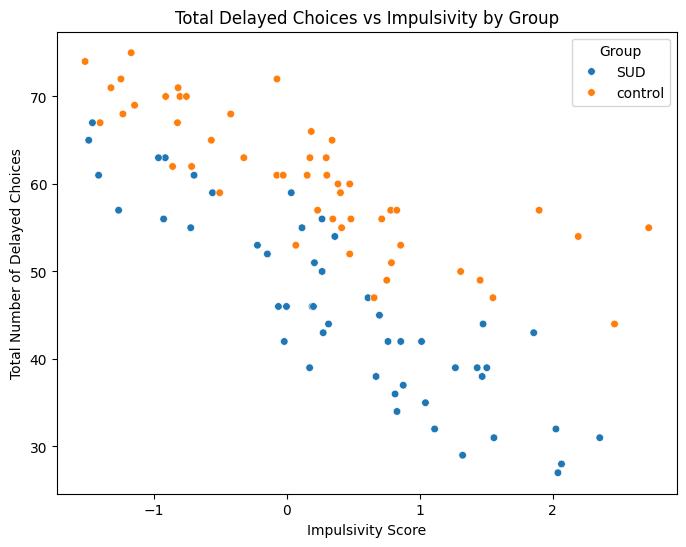

In [20]:
# 3. Plot the total number of delayed choices against impulsivity score for each group (on the same plot; color by group)
import seaborn as sns
import matplotlib.pyplot as plt
total_delayed['impulsivity'] = dd.groupby('participant_id')['impulsivity'].first().values
print(total_delayed)
plt.figure(figsize=(8,6))
sns.scatterplot(data=total_delayed,
                x='impulsivity',
                y='chose_delayed',
                hue='group',
                s=30)

plt.xlabel("Impulsivity Score")
plt.ylabel("Total Number of Delayed Choices")
plt.title("Total Delayed Choices vs Impulsivity by Group")
plt.legend(title='Group')
plt.show()